In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)


In [6]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
crypto_names = df_market_data.index.tolist()

# Set the coinid column as index
df_scaled.index = crypto_names

# Display sample data
df_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
bitcoin-cash-sv,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [8]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using `df_scaled`
    kmeans_model.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster

In [9]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)



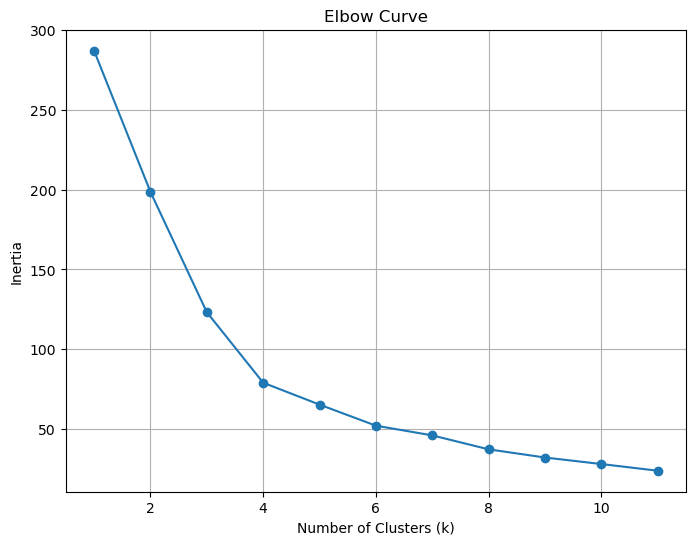

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [11]:
elbow_plot1 = df_elbow.hvplot.line(x="k_values", y="inertia_values", title ="elbow curve", xticks = k)
elbow_plot1

:Curve   [k_values]   (inertia_values)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k
best_k = 4 #Replace this with the best value for k you determined from the Elbow curve
kmeans_model = KMeans(n_clusters=best_k, random_state=0)
kmeans_model.fit(df_scaled)

# Now you have initialized the K-Means model with the best value of k.


C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [13]:
# Fit the K-Means model using the scaled data
# Now you have initialized the K-Means model with the best value of k.
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data


# Print the resulting array of cluster values.
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
# Create a copy of the DataFrame
df_copy =df_scaled.copy()


In [16]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data
# Add a new column to the DataFrame with the predicted clusters
df_copy['Cluster'] = cluster_labels

# Display sample data
print(df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
bitcoin                         -0.067495

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas as hvplot

# Create a scatter plot using hvPlot
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    cmap="viridis",  # You can choose any colormap you prefer
    hover_cols=["crypto_name"],  # Add the crypto name to identify each data point
    title="Crypto Clusters"
)

scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
### Optimize Clusters with Principal Component Analysis.
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Initialize PCA model with 3 components
pca = PCA(n_components=3)


In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_result = pca.fit_transform(df_copy)

# View the first five rows of the DataFrame. 
#df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])
#print(df_pca.head())
pca_result[:5]

array([[ 1.19408229, -0.90207402, -0.58533763],
       [ 1.00970605, -0.66358438, -1.13695032],
       [-0.72253591, -0.30763241,  0.7218133 ],
       [-0.74826646, -0.33237895,  0.55847869],
       [ 2.25853853, -1.82696614, -1.37816649]])

In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

explained_variance


array([0.37269822, 0.32489961, 0.18917649])

In [21]:
c=0.37269822+0.32489961+0.18917649
print(c)

0.8867743200000001


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.886 (almost 89% of the variance in the dataset)

In [22]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
pca_df['crypto_name'] = df_market_data.index

# Set the coinid column as index
pca_df = pca_df.set_index('crypto_name')

# Display sample data
pca_df.head()


,PCA1,PCA2,PCA3
crypto_name,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
### Find the Best Value for k Using the PCA Data
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [24]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster

In [25]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)



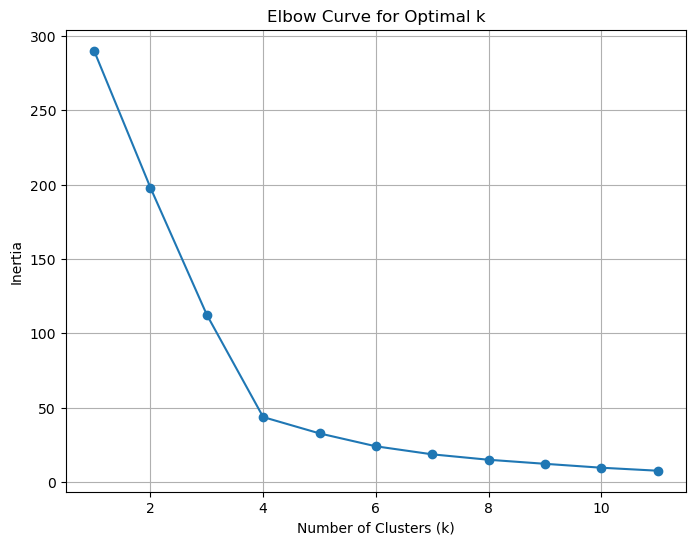

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [27]:
elbow_plot = elbow_df.hvplot.line(x="k_values", y="inertia_values", title ="elbow curve", xticks = k)
elbow_plot

:Curve   [k_values]   (inertia_values)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: it's more clearer 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
# Cluster Cryptocurrencies with K-means Using the PCA Data
# Initialize the K-Means model using the best value for k

best_k = 4 # You need to specify the best value for k based on the Elbow Curve analysis

kmeans = KMeans(n_clusters=best_k)
kmeans.fit(pca_df)

# Now, you have initialized the K-Means model with the best value of k and fit it to the PCA data.


C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [29]:
# Fit the K-Means model using the PCA data
# Now, you have initialized the K-Means model with the best value of k and fit it to the PCA data.
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)


C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bmehboob\AppData\Local\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(cluster_labels_pca)


[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [31]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
# Create a copy of the DataFrame with the PCA data
df_pca_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = cluster_labels_pca

# Display sample data
print(df_pca_copy.head())


                  PCA1      PCA2      PCA3  Cluster
crypto_name                                        
bitcoin       1.194082 -0.902074 -0.585338        1
ethereum      1.009706 -0.663584 -1.136950        1
tether       -0.722536 -0.307632  0.721813        0
ripple       -0.748266 -0.332379  0.558479        0
bitcoin-cash  2.258539 -1.826966 -1.378166        1


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

# Create a scatter plot using hvPlot
pca_analysis = df_pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Cluster",  # Color the graph points with the cluster labels
    hover_cols=["crypto_name"],  # Add crypto name for identification
    title="Cryptocurrency Clusters"
)
pca_analysis

:Scatter   [PCA1]   (PCA2,Cluster,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [33]:
scatter_plot + pca_analysis

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .Scatter.II :Scatter   [PCA1]   (PCA2,Cluster,crypto_name)

In [34]:
elbow_plot1 + elbow_plot

:Layout
   .Curve.I  :Curve   [k_values]   (inertia_values)
   .Curve.II :Curve   [k_values]   (inertia_values)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** it has made more clearer that looking at elbow k value should be 4